In [23]:
from ctypes import *
import librosa
import numpy as np
import math
import pyaudio

fs = 44100
delay_sec = 0.013
depth =0.003
mod_rate = 3.2  #Hz
feedback = 0.3
dry_wet = 0.4
CHUNK = 4096
FORMAT = pyaudio.paFloat32     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone

delay_samples = np.round(delay_sec * fs)
depth_samples = np.round(depth*fs);

mod_arg = 2*3.1416*mod_rate/fs;
print('done')

done


In [28]:
mydll = cdll.LoadLibrary(r".\fujiHarm.dll")
print('done')

done


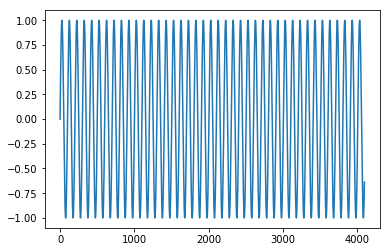

In [21]:
# offline testing,please change fujiHarm to extern function to use this demo
import matplotlib.pyplot as plt

x = np.zeros(4096);
out = np.zeros(4096);

for t in range(4096):
    x[t] = np.sin(2.0*3.141592*40.9*t/4096.0)


x = x.astype('float64');
mydll.fujiHarm(c_void_p(x.ctypes.data),4096,c_void_p(out.ctypes.data))
plt.plot(out)
plt.show()


In [33]:

# pyaudio class instance
p = pyaudio.PyAudio()
# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=fs,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

print('stream started')
# for measuring frame rate
frame_count = 0
delay_chnl = np.zeros([CHUNK,1]);
delay_buf = np.zeros([int(delay_samples+depth_samples)])
# prev_i = 0;
mydll = cdll.LoadLibrary(r".\fujiHarm.dll")
while True:
    # binary data

    data_byte = stream.read(CHUNK);
    x = np.frombuffer(data_byte, 'Float32').astype('float64');
    mydll.ola(c_void_p(x.ctypes.data),c_void_p(out.ctypes.data))

    encoded =  out.astype('float32').tobytes()
    
    stream.write(encoded)

stream.stop_stream() # pause audio stream
stream.close() # close audio stream

_ctypes.FreeLibrary(mydll._handle)

stream started


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


KeyboardInterrupt: 

In [32]:
import _ctypes
while True:
    try:
        _ctypes.FreeLibrary(mydll._handle)
    except:
        break
print('done')

done


In [ ]:
import matplotlib.pyplot as plt
import sounddevice as sd
plt.plot(out)
plt.show()